In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Reading the given dataset
data = pd.read_csv("SMSSpamCollection.txt", sep = "\t", names=["label", "message"])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
# Checking for NUll values
data.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
# Checking for duplicate values
data.duplicated().sum()

403

*There are 403 duplicated values and we have to remove them*

In [7]:
# drop duplicates
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(5169, 2)

## 1. Exploratory Data Analysis

**Let's plot the Pie Chart to check the percentage distribution of our target variable.** 

In [10]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

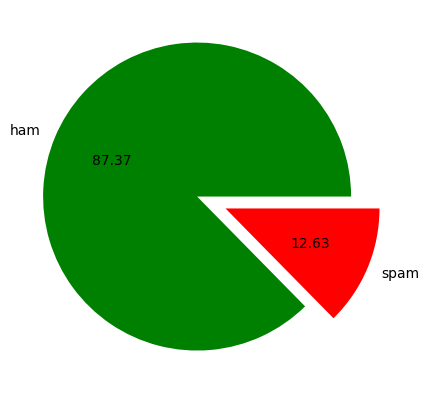

In [11]:
plt.figure(figsize=(9, 5))

plt.pie(data['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f', colors=['Green', 'Red'], explode = [.1, .1])
plt.show()

***So, we can observe that dataset is quite imbalanced as 87.37% messages are ham whereas 12.63% messages are spam.***

*Now let’s find out :*

- No. of characters in the data
- No. of words in the data
- No. of sentences in the data

*and form 3 new columns in the data depicting the no. of character, words and sentences.*

In [12]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sarath
[nltk_data]     chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# For a number of characters

data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# For a number of words
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [16]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
# For a number of sentences

data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# For Ham messages

data[data['label']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# For Spam messages:

data[data['label']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


*We can clearly see the spam messages are quite longer than the ham messages.*

<Axes: xlabel='num_characters', ylabel='Count'>

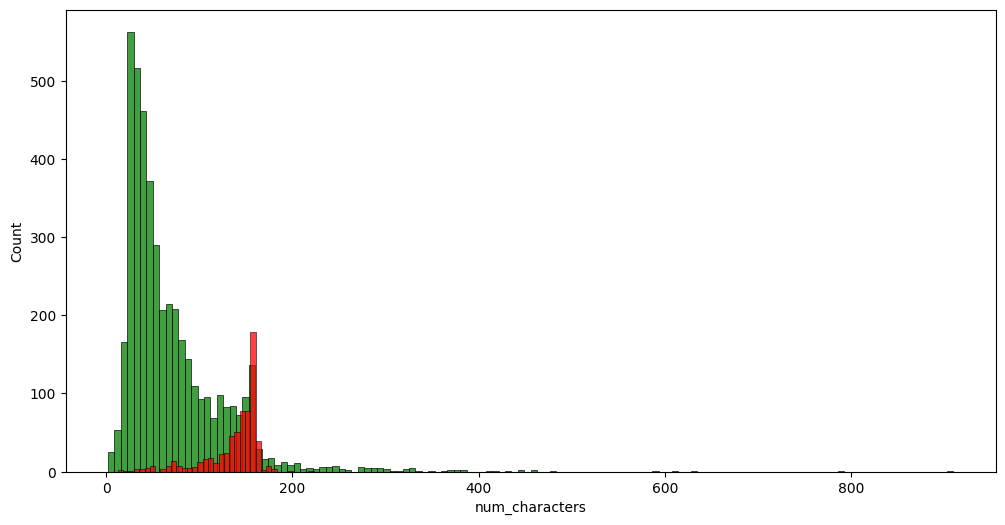

In [22]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_characters'],color='green')
sns.histplot(data[data['label']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

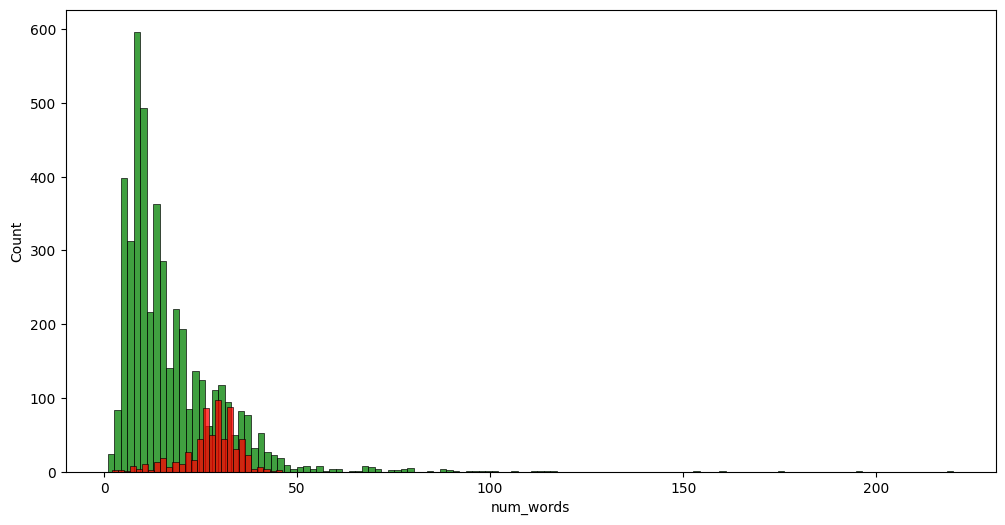

In [23]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_words'],color='green')
sns.histplot(data[data['label']=='spam']['num_words'],color='red')

### Word Cloud
*Now, to get a clear idea about the most frequent words used we make a  word cloud.*

In [24]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 388.9 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.0 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/301.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud

In [26]:
ham_msg_text = data[data.label == 'ham'].message
spam_msg_text = data[data.label == 'spam'].message

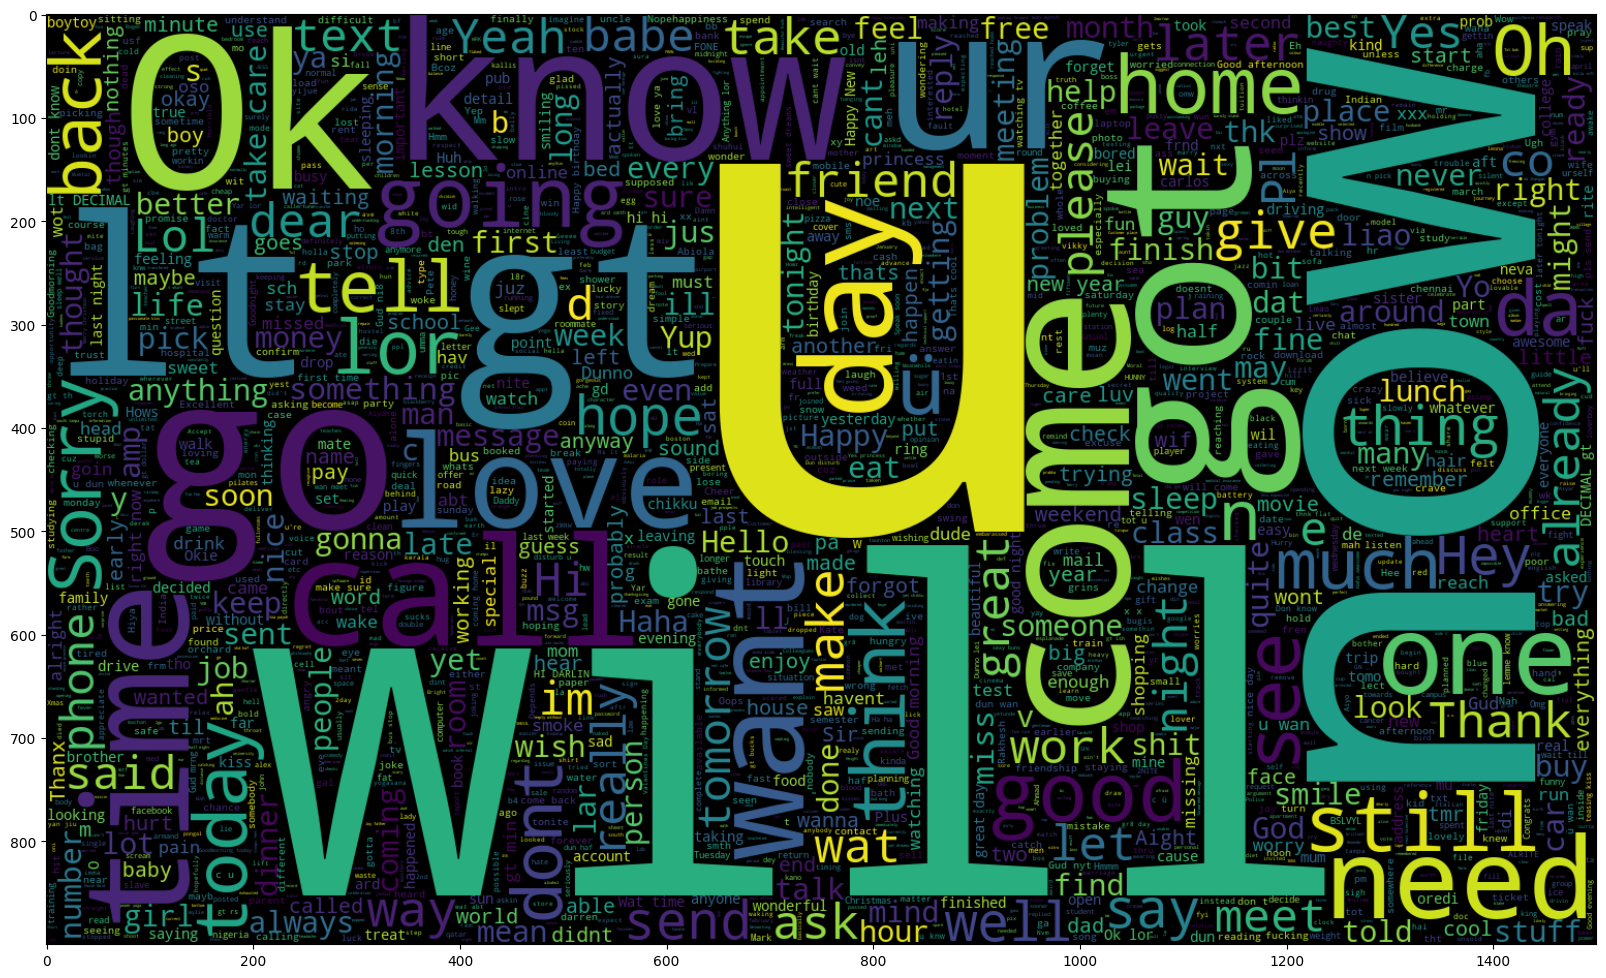

In [27]:
## Word Cloud for Ham MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

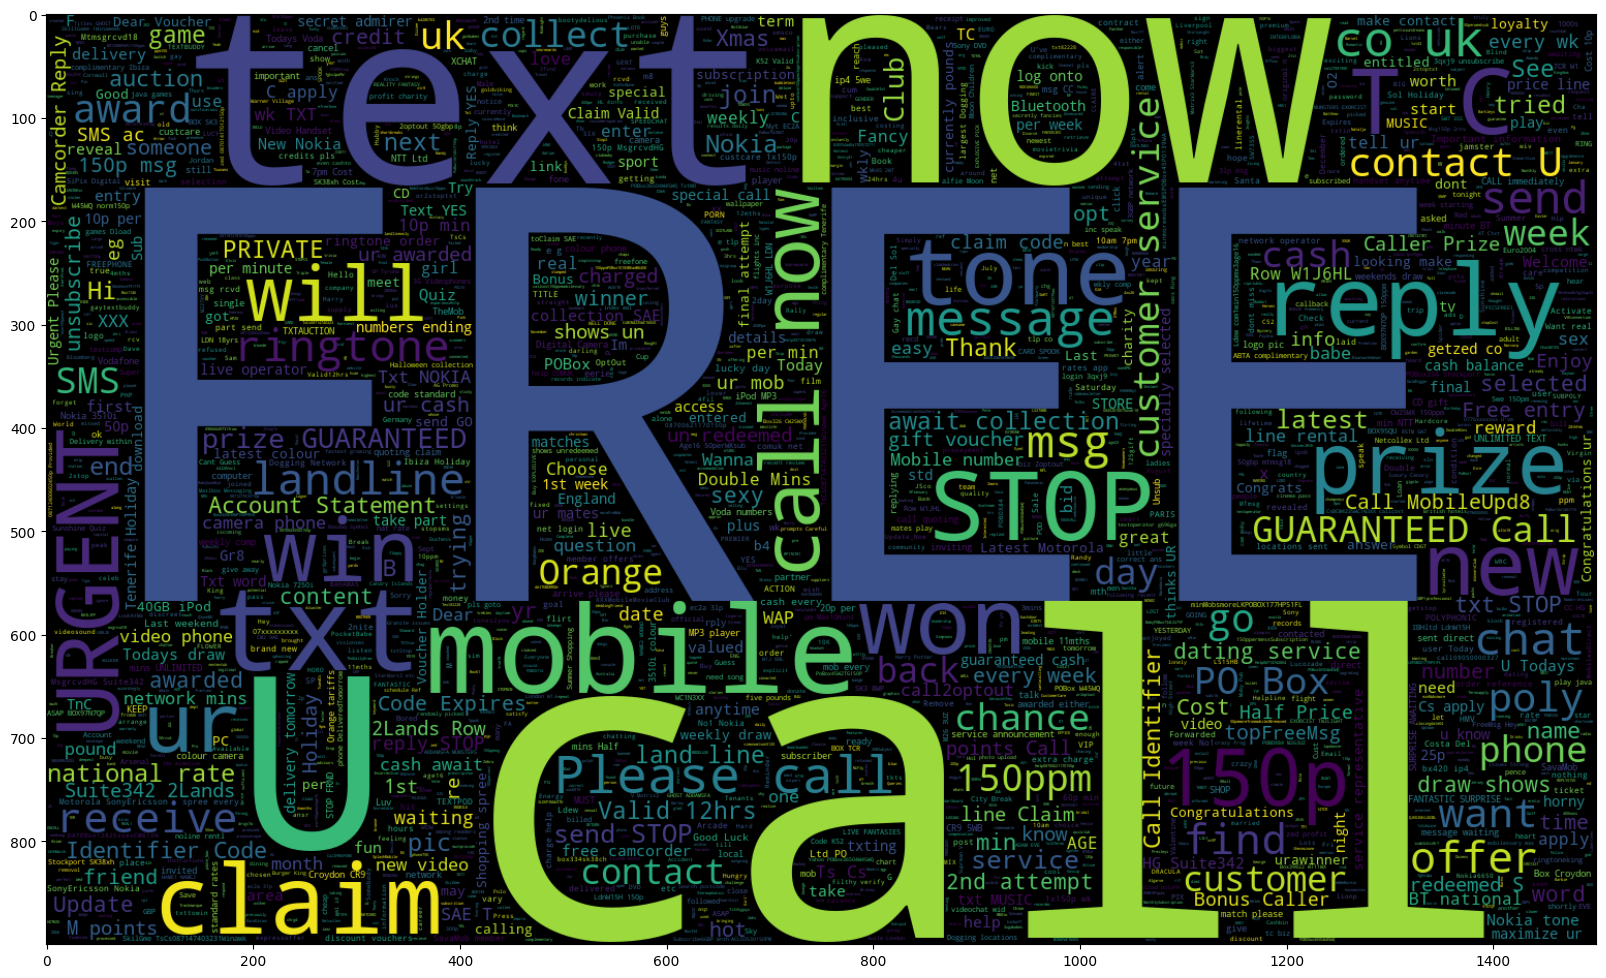

In [28]:
## Word Cloud for Spam MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

## 2. Data Pre-processing

In [29]:
u = data['message'][3]
u

'U dun say so early hor... U c already then say...'

In [30]:
v = data['message'][8]
v

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

#### 1. Remove Punctuation

In [31]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [32]:
data['message'] = data['message'].apply(remove_punc)

In [33]:
data['message'][8]

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

#### 2. Remove Special Characters

In [34]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [35]:
data['message'] = data['message'].apply(remove_noise)

In [36]:
data['message'][8]

'WINNER As a valued network customer you have been selected to receivea      prize reward To claim call             Claim code KL    Valid    hours only'

#### 3. Remove Stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sarath
[nltk_data]     chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [39]:
len(sw)

179

In [40]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [41]:
data['message'] = data['message'].apply(remove_sws)

In [42]:
data['message'][8]

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

#### 4. Lemmatization

In [43]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Sarath
[nltk_data]     chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sarath
[nltk_data]     chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sarath
[nltk_data]     chandra\AppData\Roaming\nltk_data...


True

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [45]:
data['message'] = data['message'].apply(lemma)

In [46]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,u dun say early hor u c already say,49,13,1
4,ham,nah dont think go usf life around though,61,15,1


#### 5. Label Encoder
*As this is a classification problem we want the “label” to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.*

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

data['label']=encoder.fit_transform(data['label'])

In [48]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think go usf life around though,61,15,1


In [49]:
# Select only the relevant columns for building model

data = data[['label','message']]

In [50]:
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


## 3. Feature Extraction for Converting Word to Vectors
*Apply TF-IDF Vectorizer to convert word into Vectors.*

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [52]:
X = tf.fit_transform(data['message']).toarray()
y = data['label']

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32

In [55]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

## 4. Model Building & Evaluation

In [57]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# Create the instance of Naive Bayes
clf = BernoulliNB()

In [59]:
# Fit the data
clf.fit(X_train, y_train)

BernoulliNB()

In [60]:
# Making prediction
y_pred = clf.predict(X_test)

In [61]:
# Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9893617021276596


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       917
           1       0.96      0.94      0.95       117

    accuracy                           0.99      1034
   macro avg       0.98      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034



Text(120.72222222222221, 0.5, 'Truth')

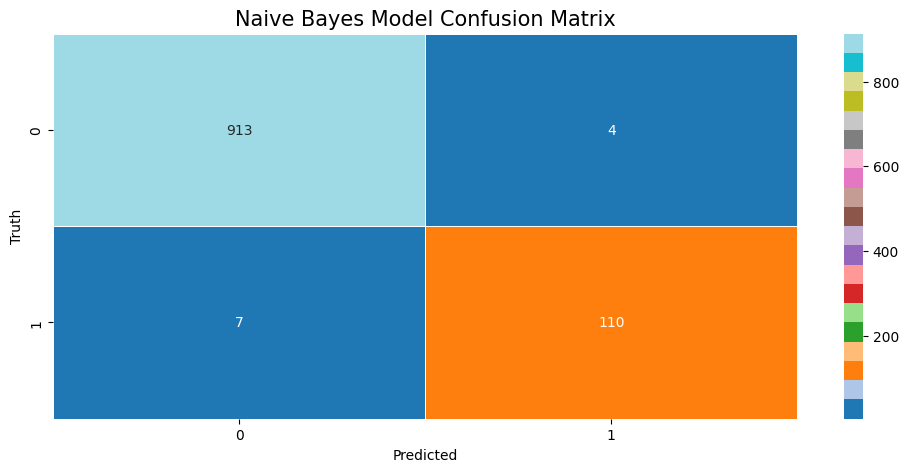

In [63]:
# Plot the Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

***Finally, After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 99% and a precision Score of 97.5%.***

## 5. Save the Model

In [64]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))